Практическая работа 2

Выполнила Каширина Татьяна ММР212

Данная работа проводится на основе датасета IBM Watson Marketing Customer Value Data
Этот датасет компания IBM предлагает для тестирования своего продукта - Watson Analytics, и он представляет собой случайный фрагмент данных о покупателях какого-то агентства по продаже автомобильных страховок

Данные содержат следующую информацию:
0   Customer - номер клиента в базе данных
1   State - штат, из которого покупатель 
2   Customer Lifetime Value - ценность покупателя за всеь жизненный цикл (в деньгах)
3   Response - отклик на маркетинговую активность
4   Coverage - покрытие, пакет услуг клиента
5   Education - образование
6   Effective To Date - клиент эффективен на дату 
7   EmploymentStatus - статус занятости
8   Gender - пол 
9   Income - доход
10  Location Code - статус места проживания (город, пригород, сельская местность)
11  Marital Status - статус брака
12  Monthly Premium Auto - ещемесежная премия за автомобиль
13  Months Since Last Claim - месяцев с последней заявки
14  Months Since Policy Inception - месяцы с момента заключения полиса  
15  Number of Open Complaints - количество открытых претензий
16  Number of Policies - количество полисов
17  Policy Type - тип полиса
18  Policy - полис
19  Renew Offer Type - тип нового предложения
20  Sales Channel - канал продаж
21  Total Claim Amount - сумма претензий
22  Vehicle Class - тип транспортного средства
23  Vehicle Size - размер транспортного средства

Цель работы - исследовать поведение клиентов страховой фирмы в контексте их реакции на маркетинговое предложение. Найти зависимость переменной Response от остальных параметров.

In [1]:
import numpy as np #импорт библиотеки numpy
import pandas as p #импорт бибилиотеки pandas
import scipy.stats as s #импорт библиотеки scipy
import matplotlib.pyplot as mp #импорт библиотеки matplotlib
import seaborn as sns #импорт библиотеки seaborn
import statsmodels.api as sm #импорт библиотеки statsmodels

In [2]:
df = p.read_csv('IBM.csv') #импорт файла данных в формате csv
df.head(10) #отображаю импортированные данные. Визуально проверяю корректность первых 10 значений

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
5,OC83172,Oregon,8256.297800,Yes,Basic,Bachelor,1/25/11,Employed,F,62902,...,94,0,2,Personal Auto,Personal L3,Offer2,Web,159.383042,Two-Door Car,Medsize
6,XZ87318,Oregon,5380.898636,Yes,Basic,College,2/24/11,Employed,F,55350,...,13,0,9,Corporate Auto,Corporate L3,Offer1,Agent,321.600000,Four-Door Car,Medsize
7,CF85061,Arizona,7216.100311,No,Premium,Master,1/18/11,Unemployed,M,0,...,68,0,4,Corporate Auto,Corporate L3,Offer1,Agent,363.029680,Four-Door Car,Medsize
8,DY87989,Oregon,24127.504020,Yes,Basic,Bachelor,1/26/11,Medical Leave,M,14072,...,3,0,2,Corporate Auto,Corporate L3,Offer1,Agent,511.200000,Four-Door Car,Medsize
9,BQ94931,Oregon,7388.178085,No,Extended,College,2/17/11,Employed,F,28812,...,7,0,8,Special Auto,Special L2,Offer2,Branch,425.527834,Four-Door Car,Medsize


В превью столбцы 11-14 были сокращены. Выведу значения этих столбцов, чтобы оценить данные

In [3]:
df[['Location Code','Marital Status','Monthly Premium Auto','Months Since Last Claim']].head(10) 

,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim
0,Suburban,Married,69,32
1,Suburban,Single,94,13
2,Suburban,Married,108,18
3,Suburban,Married,106,18
4,Rural,Single,73,12
5,Rural,Married,69,14
6,Suburban,Married,67,0
7,Urban,Single,101,0
8,Suburban,Divorced,71,13
9,Urban,Married,93,17


In [4]:
df.info() #смотрю более подробную информацию по датасету

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [5]:
df['Response'] = df['Response'] == 'Yes' #преобразую числовую переменную отклик в переменную логического типа
df.Response.head (10)

0    False
1    False
2    False
3    False
4    False
5     True
6     True
7    False
8     True
9    False
Name: Response, dtype: bool

<AxesSubplot: ylabel='Policy Type'>

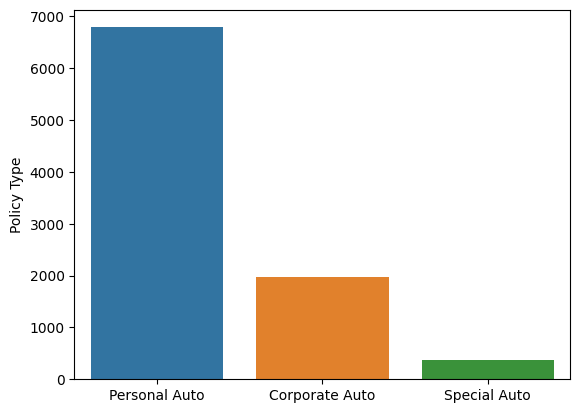

In [6]:
#посмотрим, как распределены респонденты по типам полисов
sns.barplot(x = df['Policy Type'].value_counts().index, y = df['Policy Type'].value_counts())

<AxesSubplot: xlabel='Response'>

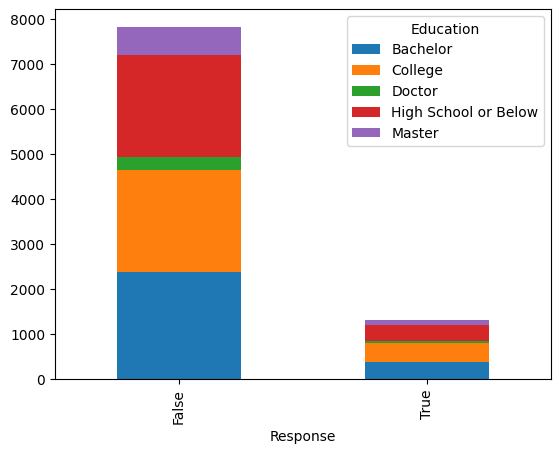

In [7]:
#посмотрим на состав откликнувшихся и не откликнувшихся на предложение с точки зрения образования
df.groupby('Response')['Education'].value_counts().unstack().plot(kind='bar', stacked=True)

In [8]:
df['Response'].value_counts() #смотрю, сколько людей в выборке откликнулись

False    7826
True     1308
Name: Response, dtype: int64

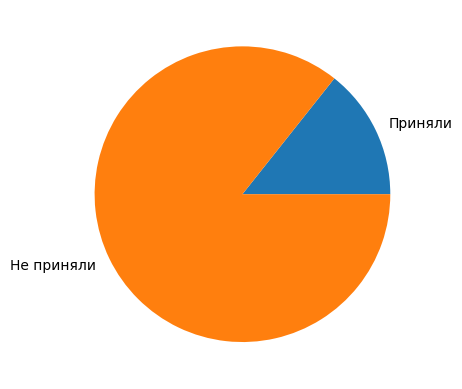

In [9]:
p = mp.pie([1308, 7826], labels=['Приняли', 'Не приняли'])
mp.show()

Если перевести на процентное соотношение, то 14% приняли предложение, против 86% не принявших

Построю распределение всех покупателей по предложениям и каналам продаж

In [10]:
resp = df.groupby(['Renew Offer Type', 'Sales Channel'])['Customer'].count().unstack()
print(resp)

Sales Channel     Agent  Branch  Call Center  Web
Renew Offer Type                                 
Offer1             1690    1099          588  375
Offer2              978     788          647  513
Offer3              518     394          291  229
Offer4              291     286          239  208


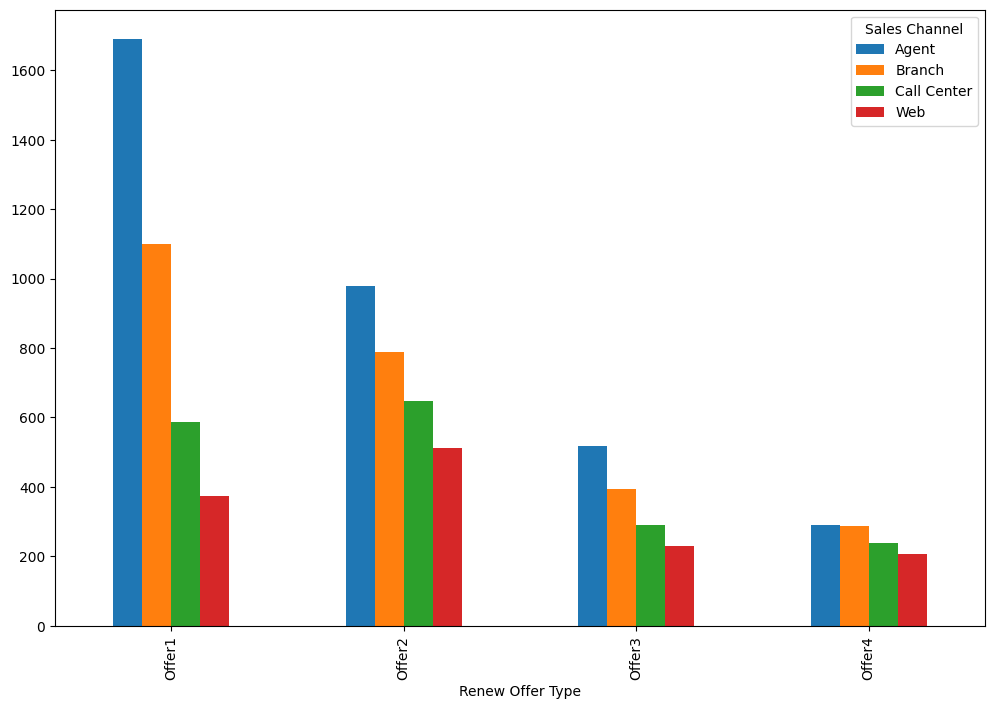

In [11]:
df.groupby(['Renew Offer Type', 'Sales Channel'])['Customer'].count().unstack().plot(kind='bar', figsize=(12, 8))
mp.show()

Проанализирую теперь только положительные отклики
Для начала вынесу их в отдельный датасет, чтобы иметь возможность проверить корректность группировок и далее сравнить относительно общих значений

In [12]:
resp_by_chan=df[df['Response']== 1].groupby(['Renew Offer Type', 'Sales Channel'])['Customer'].count().unstack()
print(resp_by_chan)

Sales Channel     Agent  Branch  Call Center   Web
Renew Offer Type                                  
Offer1            336.0   168.0         42.0  48.0
Offer2            312.0   126.0        150.0  96.0
Offer3             18.0     NaN          NaN  12.0


Для проверки можно сложить значения в таблице. Дложно получиться то же число, что и количество позитивных откликов, полученное ранее.
336 + 312 + 18 + 168 + 126 + 42 + 150 + 48 + 96 + 12 = 1308 (как и ранее)

Визуализирую полученные данные

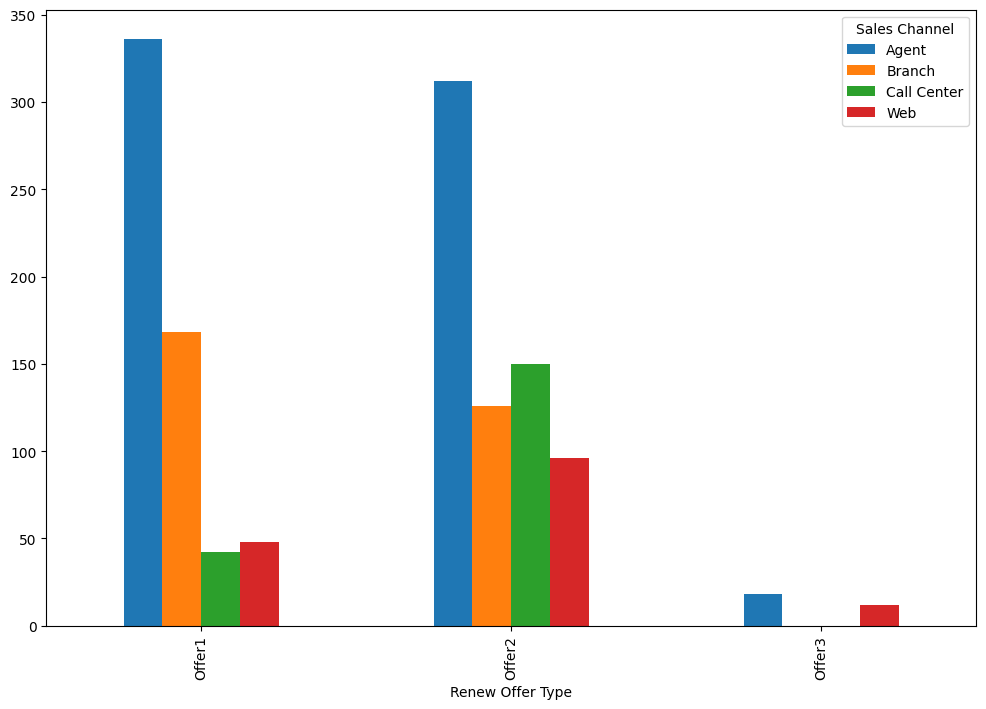

In [13]:
p = (resp_by_chan).plot(kind='bar', figsize=(12, 8))
mp.show()

Из графиков выше можно получить следующие выводы:
1. Предложение с типом 4 не эффективно, поскольку не было принято ни разу
2. По самой частотной группе - предложение 1 через агента видим, что % согласий примерно 19%, что близко к изначальным 14%. Значит предложение 1, сделанное через каналы Call Center и Web было не эффективно
3. Самым эффективным оказалось предложение 2, сделанное через агента. Его приняли почти в 32% случаев
4. Предложение 3 также имеет низкую эффективность

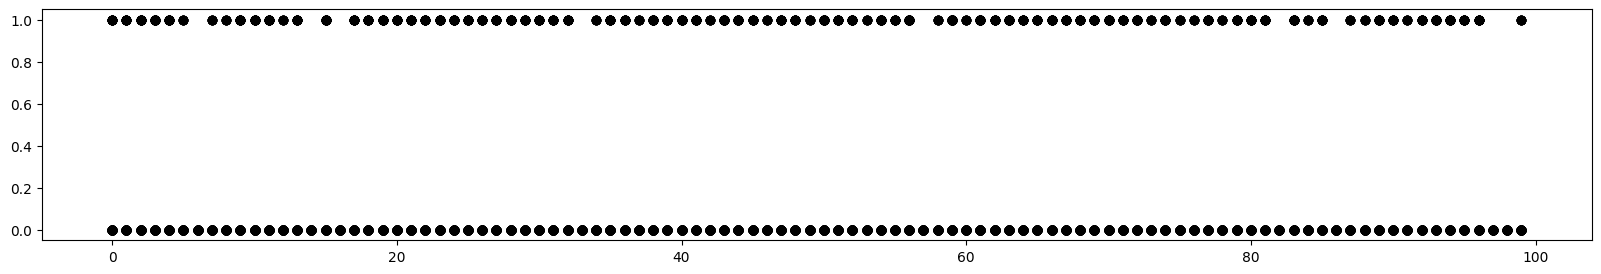

In [14]:
#посмотрю, есть ли зависимость согласия на предложения от дней с момента покупки последней лицензии
ax = mp.subplots(figsize=(20, 3))
ax = mp.scatter(df['Months Since Policy Inception'], df['Response'], color = 'black')

Лигистическойц зависимости на графике выше не наблюдается, отклик на предложение не зависит от длительности времени с момента приема последнего полиса

0    0
Name: Income, dtype: int64


<AxesSubplot: >

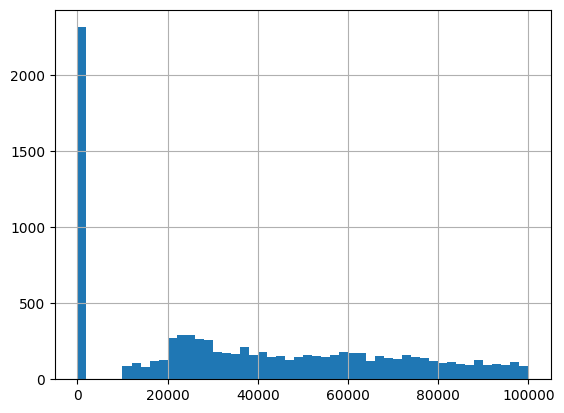

In [15]:
print(df['Income'].mode()) #ищу моды для показателя дохода, чтобы узнать, как распределены клиенты в выборке
df['Income'].hist(bins=50)

Вижу, что доход распределяется равномерно с о слабо заметным пиком примерно на 25тыс. Заметный выброс - респоненты с нулевым доходом

Далее хотела бы проверить, существует ли корреляция между доходом и откликом на предложение.

In [16]:
print('Corr_Income = ', df['Income'].corr(df['Response']))

Corr_Income =  0.011932249291619736


Коэффициент корреляции 0,01 что говорит об отсутствии корреляции

Посмотрим, есть ли корреляция между всеми переменными, являющимися численными и построим тепловую карту для наглядности

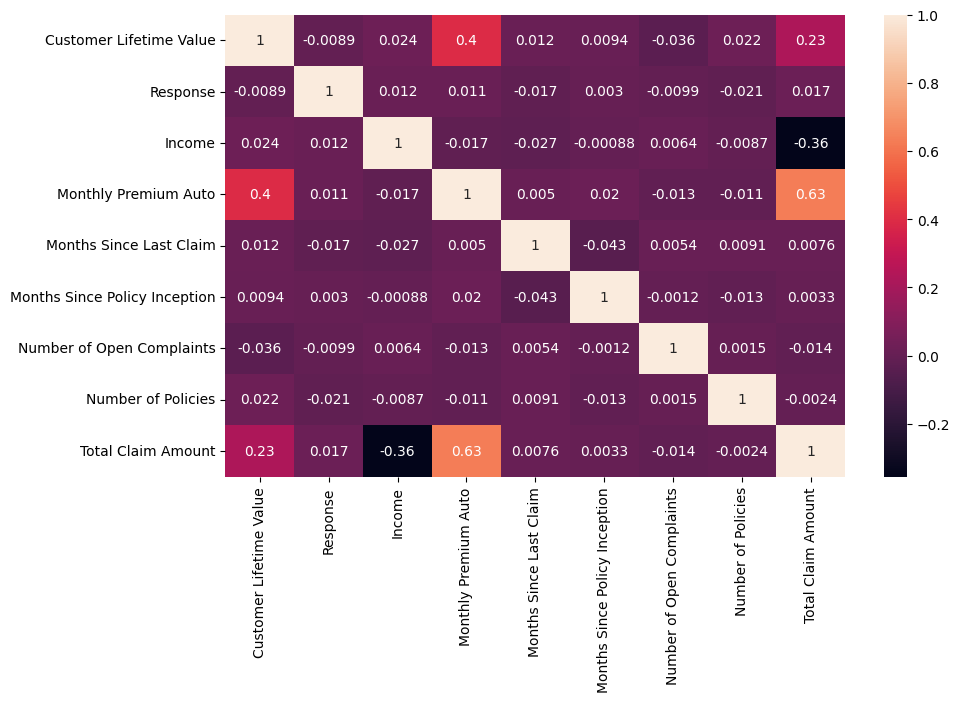

In [17]:
only_num = df[['Customer Lifetime Value', 'Response', 'Income', 'Monthly Premium Auto', 'Months Since Last Claim', 
               'Months Since Policy Inception', 'Number of Open Complaints', 
               'Number of Policies', 'Total Claim Amount']]

mp.figure(figsize=(10,6))
sns.heatmap(only_num.corr(), annot = True)
mp.show()

Наша исследуемая переменная responce никак не зависит от суммы ежемесячной страховой премм, общей ценности жизненного цикла и переменных связанных со временем заключения последнего контракта.

На тепловой карте видны лишь довольно очевидные корреляции между ежемесячной страховой премией и общей суммой претензий, а также ежемесячной премией и общей суммой за весь жизненный цикл.

По смотрю, как распределяются позитивные и отрицательные отклики в зависимости от статуса занятости респондента

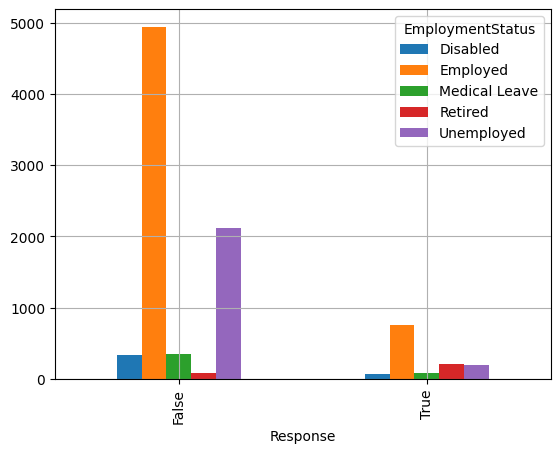

In [18]:
employ=df.groupby(['Response', 'EmploymentStatus'])['Customer'].count()
employ = employ.unstack()
employ.plot(kind='bar', grid=True)
mp.show()

На графике видно, что количество безработных, не откликнувшихся на предложение значительно болше, чем согласившихся

Хотела бы проверить гипотезу: "Между статусом занятости респондента и откликом на предложение есть взаимосвязь"

Нулевую гипотезу тогда можно сформулировать так: "Между статусом занятости и откликом на предложение взаимоствязи нет"

In [19]:
hip_test = df.groupby('EmploymentStatus')['Response'].value_counts().unstack()
hip_test

Response,False,True
EmploymentStatus,,
Disabled,333,72
Employed,4942,756
Medical Leave,354,78
Retired,78,204
Unemployed,2119,198


In [20]:
alpha = 0.05
dof = (5 - 1)*(2 - 1)
print(dof)

4


In [21]:
critical_value = 9.49

s.chi2_contingency (hip_test)

(850.6926259445812,
 8.020582120764955e-183,
 4,
 array([[ 347.00350339,   57.99649661],
        [4882.03941318,  815.96058682],
        [ 370.13707029,   61.86292971],
        [ 241.61725422,   40.38274578],
        [1985.20275892,  331.79724108]]))

850.7 > 9.49 - нулевая гипотеза отвергнута. Между статусом занятости и откликом на предложение есть взаимосвязь

Проверим еще 1 гипотезу. "Между уровнем образования и откликом на предложение есть взаимосвязь"

Нулевой будет являться гипотеза, что между этими переменными взаимосвязи нет

In [22]:
hip_test = df.groupby('Education')['Response'].value_counts().unstack()
hip_test

Response,False,True
Education,,
Bachelor,2370,378
College,2273,408
Doctor,282,60
High School or Below,2280,342
Master,621,120


In [23]:
s.chi2_contingency (hip_test)

(10.977692567761025,
 0.026815866387951,
 4,
 array([[2354.48303044,  393.51696956],
        [2297.07751259,  383.92248741],
        [ 293.02518064,   48.97481936],
        [2246.52638494,  375.47361506],
        [ 634.88789139,  106.11210861]]))

Для alpha = 0.05 и 4 степеней свободы, критическое значение = 9.49
Поскольку 10.98 > 9.49, то с вероятностью 95% зависимость есть

Если бы мы выбрали alpha = 0.01, критическое значение было бы равно 13.28, 
а значит для доверительного интервала 99% нулевая гипотеза была бы отвергнута 

Далее проверим, есть ли зависимость между полом и ежемесячной страховой премией. Для этого может быть использован двувыборотный т-критерий.

Нулевая гипотеза: между полом и страховой премией нет взаимосвязи

Выделю отдельно датасет только с полом и ежемесячной премией. А затем из него выделю только датасет с мужчинами и с женщинами

In [24]:
all = df[['Gender','Monthly Premium Auto']]
all['Gender'] = (all['Gender'] == 'M')
all.head(10)

C:\Users\Tanya\AppData\Local\Temp\ipykernel_5832\3148294397.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all['Gender'] = (all['Gender'] == 'M')


,Gender,Monthly Premium Auto
0,False,69
1,False,94
2,False,108
3,True,106
4,True,73
5,False,69
6,False,67
7,True,101
8,True,71
9,False,93


In [25]:
wom = all[all['Gender'] == 0]
wom.head(10)

,Gender,Monthly Premium Auto
0,False,69
1,False,94
2,False,108
5,False,69
6,False,67
9,False,93
11,False,110
15,False,64
19,False,101
21,False,79


In [26]:
men = all[all['Gender'] == 1]
men.head(10)

,Gender,Monthly Premium Auto
3,True,106
4,True,73
7,True,101
8,True,71
10,True,67
12,True,110
13,True,110
14,True,70
16,True,67
17,True,101


In [27]:
s.ttest_ind(wom['Monthly Premium Auto'], men['Monthly Premium Auto'], equal_var = False)

Ttest_indResult(statistic=-0.37433367572407317, pvalue=0.7081647896730772)

Полученное значение меньше t-критического, а значит нулевая гипотеза не может быть отвергнута. Между полом и страховой премией действительно нет взаимосвязи

Далее посмотрим, какие числовые параметры можно описать с использованием линейной регрессии. 
Ранее мы уже строили тепловую карту для всех числовых переменных, тепрь постороим парные графики для той же таблицы

<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


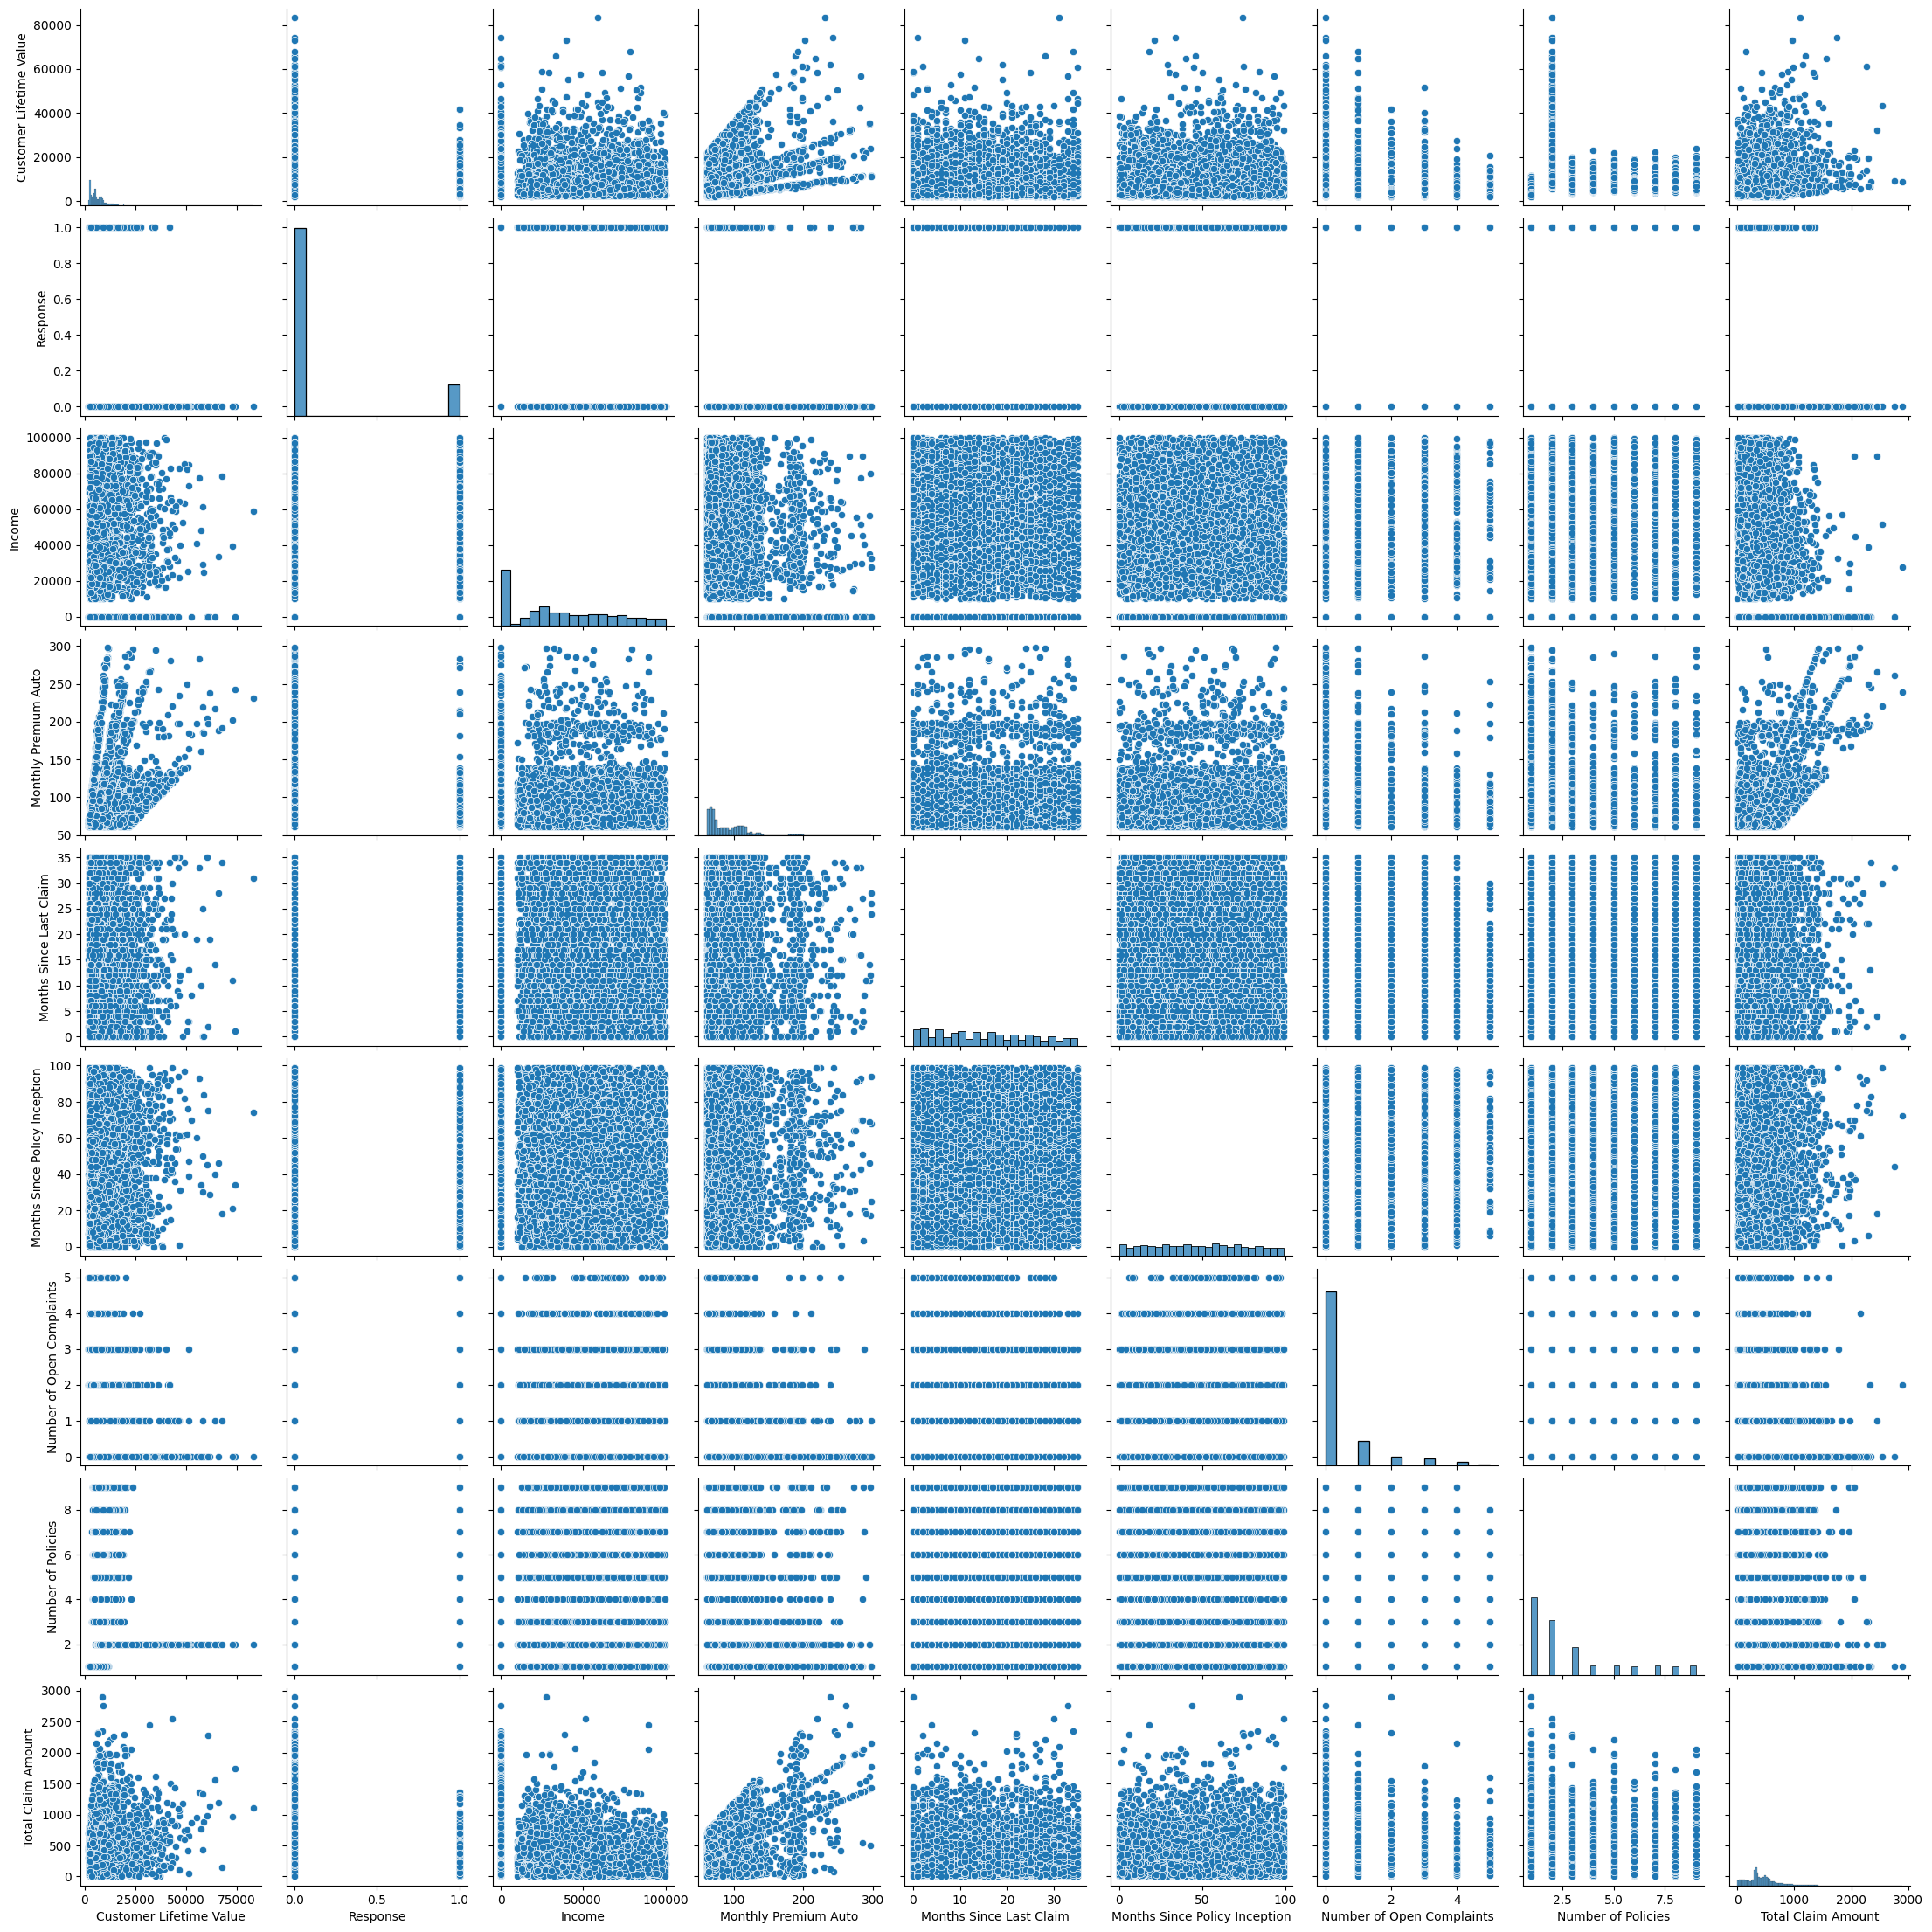

In [28]:
sns.pairplot(only_num)

Ближе всего к линейной зависимости зависимость между Total claim amount и Monthly Premium Auto, найдем уравнение регрессии

In [29]:
x = only_num['Monthly Premium Auto']
y = only_num['Total Claim Amount']

res = s.linregress(x, y)
print(res)

LinregressResult(slope=5.335999552055306, intercept=-63.32929837275793, rvalue=0.6320166625194121, pvalue=0.0, stderr=0.06846690180934197, intercept_stderr=6.803286568187277)


Получили уравнение регрессии для зависимости суммы претензий от ежемесячной авто премии. Уравнение Y = 5.336X - 63.329

Вычислю коэффициент детерминации для модели

In [30]:
r_sq = res.rvalue ** 2
print(r_sq)

0.3994450617021765


Как и ожидалось, при коэффициенте корреляции 0.6, данные не очень хорошо описываются моделью линейной регрессии.
Построенная модель может описать данные примерно на 40%

Посмотрим, как это будет выглядеть на графике

<function matplotlib.pyplot.show(close=None, block=None)>

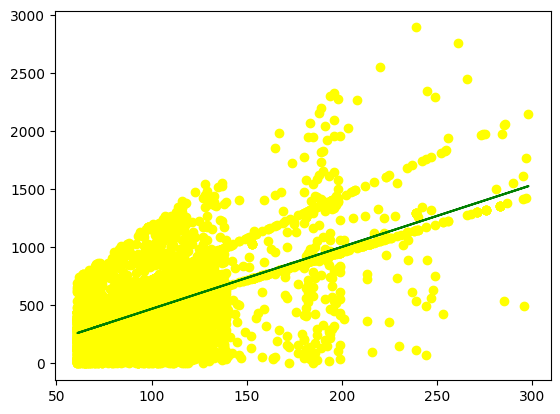

In [31]:
mp.scatter(x, y, color = 'yellow')
mp.plot(x, res.slope * x + res.intercept, color = 'green')
mp.show

Ранее мы увидели, что зависимость между занятостью и откликом на предложение есть. Безработные реже откликаются на предложение. У безработных уровень дохода будет нулевым, значит та же зависимость должна наблюдаться между доходом и откликом. Эту зависимость нельзы описать в виде линейной регрессии в силу бинарности переменной отклик, но должно быть можно описать при помощи логистической регрессии.

In [32]:
x = sm.add_constant(df['Income'])
y = df['Response']

logit = sm.Logit(y, x)
res = logit.fit()
print(res.summary())

Optimization terminated successfully.
         Current function value: 0.410661
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Response   No. Observations:                 9134
Model:                          Logit   Df Residuals:                     9132
Method:                           MLE   Df Model:                            1
Date:                Wed, 14 Dec 2022   Pseudo R-squ.:               0.0001729
Time:                        18:26:43   Log-Likelihood:                -3751.0
converged:                       True   LL-Null:                       -3751.6
Covariance Type:            nonrobust   LLR p-value:                    0.2547
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.8315      0.048    -38.116      0.000      -1.926      -1.737
Income      1.118e-06    9.8e

Модель не статистически значимая, слишком большое значение p-value и маленькое значение Pseudo R-squ

Результаты анализа:
1. Были проанализированы данные о клиентах страховой копании в разрезе образования, типов полисов, типов предложений, дохода, статуса работы и прочих факторов
2. В ходе анализа по типам предложений были выявлены наиболее эффективные предложения и каналы, через которые они давались
3. Для числовых переменных построена тепловая карта корреляции. К сожалению, ни в одной паре переменных не наблюдается сильная корреляция. 
4. Протестирована гипотеза о наличии взаимосвязи между статусом занятости респондента и откликом. Гипотеза подтверждена, между переменными существует взаимосвязь
5. Гипотеза о наличии взаимосвязи между образованием и откликом подтверждается на доверительном интервале 95%, но отвергается на доверительном интервале 99%
6. Между полом и страховой премией взаимосвязи нет, гипотеза о наличии взаимосвязи отвергнута.
7. Умеренная корреляция наблюдается у переменных Monthly Premium Auto и Total Claim Amount. Для этой зависимости построена модель линейной регрессии, которая объясняет данные на 40%
8. Азаимосвязь между доходом и откликом на предложение не может быть описана при помощи простой линейной регрессии.